In [479]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [480]:
df=pd.read_csv('titanic.csv')
df.head()
df.shape

(891, 12)

In [481]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [482]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [484]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [485]:
#outliers may be present in Fare , Age,PassengerId,SibSp,Parch

In [486]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [487]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [488]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [489]:
#sns.heatmap(df.isnull(),annot=True)

In [490]:
#woof lot of missing data in age and cabin feature
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [491]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [492]:
#too much missing data in cabins
df = df.drop(['Cabin'],axis = 1)# done after checking correlation

In [493]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [494]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [495]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [496]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [497]:
#average age of the titanic passengers?

df["Age"].mean()

29.69911764705882

In [498]:
# median age and ticket fare price of the titanic passengers?

df[["Age", "Fare"]].median()

#The statistic applied to multiple columns of a DataFrame
#(the selection of two columns return a DataFrame, see the subset data tutorial) is calculated for each numeric column.

Age     28.0000
Fare    14.4542
dtype: float64

In [499]:
#The aggregating statistic can be calculated for multiple columns at the same time.
#Remember the describe function from first tutorial tutorial?

df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [500]:
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,214
2,184,184,184,184,173,184,184,184,184,184
3,491,491,491,491,355,491,491,491,491,491


In [501]:
df [['Pclass','Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [502]:
#we can see different Pclass has different survival rate

In [503]:
df [['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [504]:
#as we have already know from titanic movie female has more survival rate than male
#I learnt data science just to prove that

In [505]:
df [[ 'Age','Survived']].groupby(['Survived']).mean()

,Age
Survived,
0,30.626179
1,28.343690


In [506]:
#lets deal with missing data in Embarked feature then again
df['Embarked'].fillna(df['Embarked'].mode()) #mode cause categorical data

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [507]:
df.isnull().sum()#why

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [508]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [509]:
df.isnull().sum()#why

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [510]:
df [['Embarked','Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex','Embarked']).mean()

Survived
Pclass Sex    Embarked          
1      female C         0.976744
              Q         1.000000
              S         0.960000
       male   C         0.404762
              Q         0.000000
              S         0.354430
2      female C         1.000000
              Q         1.000000
              S         0.910448
       male   C         0.200000
              Q         0.000000
              S         0.154639
3      female C         0.652174
              Q         0.727273
              S         0.375000
       male   C         0.232558
              Q         0.076923
              S         0.128302

In [511]:
df [[ 'Age','Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [512]:
#the thing is i wanted to fill the average age in the null values with respect to Pclass cause different pclass different survival rate
#but due to lack of knowledge i cant do that at the moment

In [513]:
#so lets fill nan values in null using fillna or simple imputer

In [514]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [515]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [516]:
#ok good

In [517]:
#dealt with missing data------> Age and Embarked

In [518]:
#df['Age']=df['Age'].fillna(df['Age'].median())

In [519]:
#from sklearn.impute import SimpleImputer

In [520]:
#imp = SimpleImputer(missing_values=np.nan, strategy='mode')
#imp=imp.fit(df)
#dst=imp.transform(df.values)

#dst

correlation

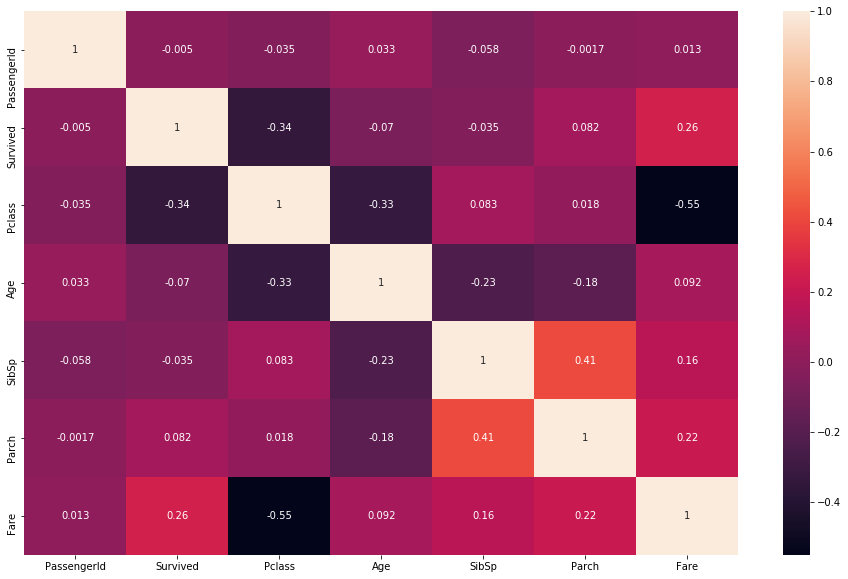

In [521]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [522]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


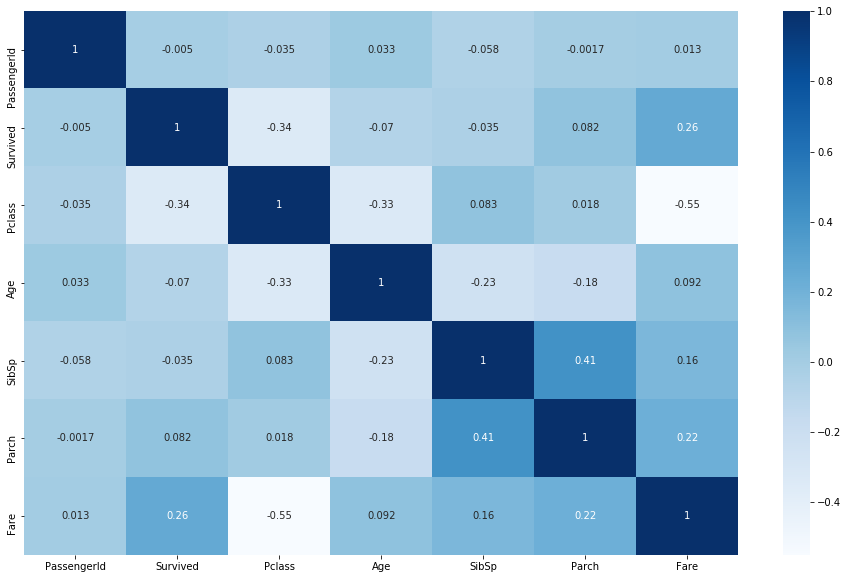

In [523]:
plt.figure(figsize=(16,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [524]:
#we can see that survival is correlated with Pclass and Fare

skewness

In [525]:
#lets check the skeness of the dataset
df.skew()
#if the value is mmore than 0.55 then some skewness is present

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [526]:
#(#Treating using log)

#Treating using log
#import numpy as np
#for col in df.columns:
#    if df.skew().loc[col]>0.55:
#        df[col]=np.log1p(df[col])

In [527]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [528]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

Outliers present

In [529]:
#to chech outliers in
#Fare,Age,PassengerId,SibSp,Parch # cause rest all are categorical data

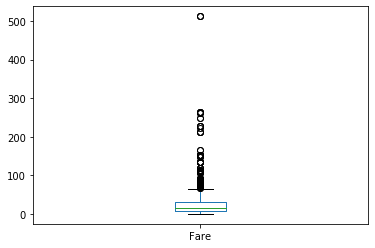

In [530]:
df['Fare'].plot.box()

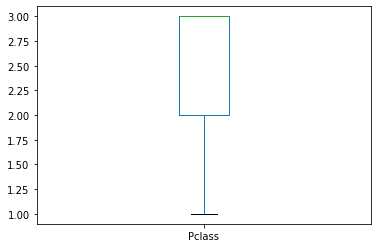

In [531]:
df['Pclass'].plot.box()

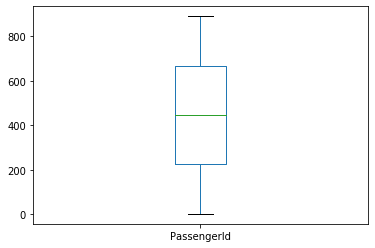

In [532]:
df['PassengerId'].plot.box()

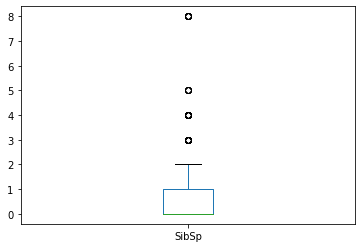

In [533]:
df['SibSp'].plot.box()

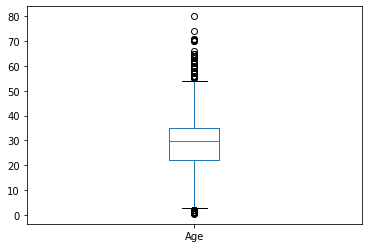

In [534]:
df['Age'].plot.box()

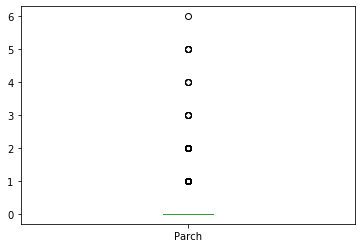

In [535]:
df['Parch'].plot.box()

Conclusion ----> we can see outliers present in Parch,Age,Fare,SibSp

In [536]:
#one thing i forgot to remove non useful column 
df.drop(['Name','Ticket'],axis=1,inplace=True) #logically thinking survival has nothing to do with name and Ticket

In [537]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [538]:
#label encoder(categorical to numerical)
#idk why i am doing this may be required in the future
#i got the answer in the future its because of using standard scaling technique and using Zscore
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Embarked']= label_encoder.fit_transform(df['Embarked']) 
df['Sex']= label_encoder.fit_transform(df['Sex'])


In [539]:
df.shape

(891, 9)

In [540]:
#zscore

In [541]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
dfnew=df.loc[(z_score<3).all(axis=1)]
print(dfnew.shape)

(891, 9)
(820, 9)


# Now ML process Classification

In [542]:
y=dfnew['Survived']
dfnew.drop(['Survived'], axis=1, inplace=True)
x=np.array(dfnew)
print(x.shape)

(820, 8)


In [543]:
x.shape

(820, 8)

In [544]:
y.shape

(820,)

In [545]:
#preprocessing the data
#we need to feature scale for using knn classifier or any other classifier using euclidian distance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
print(newx)

[[-1.74360547  0.8339949   0.72203588 ... -0.4511409  -0.62370675
   0.58316179]
 [-1.73968479 -1.58680446 -1.38497273 ... -0.4511409   1.52510914
  -1.95366932]
 [-1.7357641   0.8339949  -1.38497273 ... -0.4511409  -0.60105524
   0.58316179]
 ...
 [ 1.73796351  0.8339949  -1.38497273 ...  3.0889121  -0.08007059
   0.58316179]
 [ 1.7418842  -1.58680446  0.72203588 ... -0.4511409   0.13973292
  -1.95366932]
 [ 1.74580488  0.8339949   0.72203588 ... -0.4511409  -0.60692786
  -0.68525377]]


In [546]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=42)

In [547]:
#DecisionTreeClassifier(criterion='gini')---------->default
#DecisionTreeClassifier(criterion='entropy')
#gini and entropy
dtc=DecisionTreeClassifier() #gini
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7886178861788617
[[132  28]
 [ 24  62]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       160
           1       0.69      0.72      0.70        86

    accuracy                           0.79       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.79      0.79      0.79       246



In [548]:
#k=10
dtc=KNeighborsClassifier() 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8130081300813008
[[139  21]
 [ 25  61]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       160
           1       0.74      0.71      0.73        86

    accuracy                           0.81       246
   macro avg       0.80      0.79      0.79       246
weighted avg       0.81      0.81      0.81       246



In [549]:
model=DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.7926829268292683
[[134  26]
 [ 25  61]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       160
           1       0.70      0.71      0.71        86

    accuracy                           0.79       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.79      0.79      0.79       246



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=

In [550]:
#Lets use SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(newx,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [561]:
svr=SVC(kernel="rbf",C=1)
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))

0.8292682926829268


In [552]:

#Lets save above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(SVC(), 'titanic.pkl')

['titanic.pkl']